# Introduction
This tutorial will introduce some common techques to deal with time series. Time series is a very important part of data in many fields like financial, engineering, etc. I think mostly data scientists are dealing with time series on daily basis. Time series data generally have two specialties: firstly, it is time dependent, which means values are not independent from each other, and the basic assumption for linear regression broke down; secondly, time series tends to have trends and seasonalities. When handing this kind of data, we should better keep the two in mind. And also because of the two reasons, we can make predictions about time series' future values. Thus, this tutorial will briefly introduce these features and also prediction methods and packages that can be applied to handle this kind of data.

## Content
This tutorial will be made up of the following three parts.
- [Install libaries](#Install-libraries)
- [Time Series Basics](#Time-Series-Basics)
- [Prediction: prophet introduction](#Prediction:-prophet-introduction)



## Install libraries

The most common libraries we need for time series are the same as other kinds of data - numpy and pandas. These two are almost everywhere when we are dealing with data. We will use them for some basic operations. Also I will introduce a very useful package - [prophet](https://facebook.github.io/prophet/), which is developed by Facebook - for prediction.
I recommend use `prophet` by `virtulenv` because it has lots of dependencies, especially for Windows users. This package requires a [C++ compliler](http://landinghub.visualstudio.com/visual-cpp-build-tools). However, by using `Anaconda`, `prophet` can be easily installed by following command:

    $ conda install -c conda-forge fbprophet
    
After that, you can simply use it in your `python` code by:

In [1]:
from fbprophet import Prophet

## Time Series Basics

There are some basic features in time seires. We will use a sample data to see the features behind them. The dataset can be found [here](https://trends.google.com/trends/explore?date=all&q=diet,gym,finance).

In [2]:
# load packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
df = pd.read_csv("multiTimeline.csv", skiprows=1)
df.columns = ['month', 'diet', 'gym', 'finance']
df.set_index('month', inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01,100,31,47
2004-02,75,27,49
2004-03,69,24,48
2004-04,71,23,48
2004-05,75,22,43


The data contains 4 columns with 'month' being the index column. The rest 3 columns are relative values standing for number of searching that have been conducted in that month. For time series, the most import feature is its trends and seasonality. 
###  Trends
One of the most useful way to identify the trends of time series is to do a `rolling average` or `moving average`. It basically takes the average of temporal neaby values from a point. The averaging will takes away the influence of seasonality and gaussian noise on the dataset so that we could find out the trend of the time series. The batch size for average is called `window size`, which is chosen majorly based on experiment and experience. Generally, the larger `window size` is, the smoother the trends will be. Below I will show a demo for a rolling average trends with `window size` 4, 8, 12. We will use `pandas` builtin method `rolling()` to implement this method.

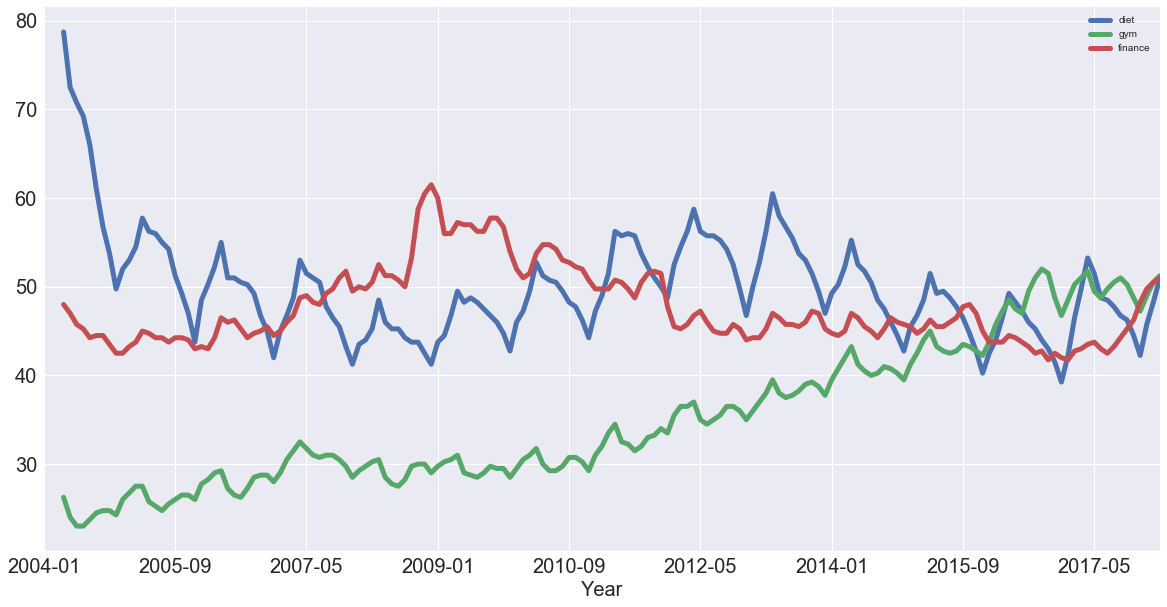

In [3]:
df.rolling(4).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

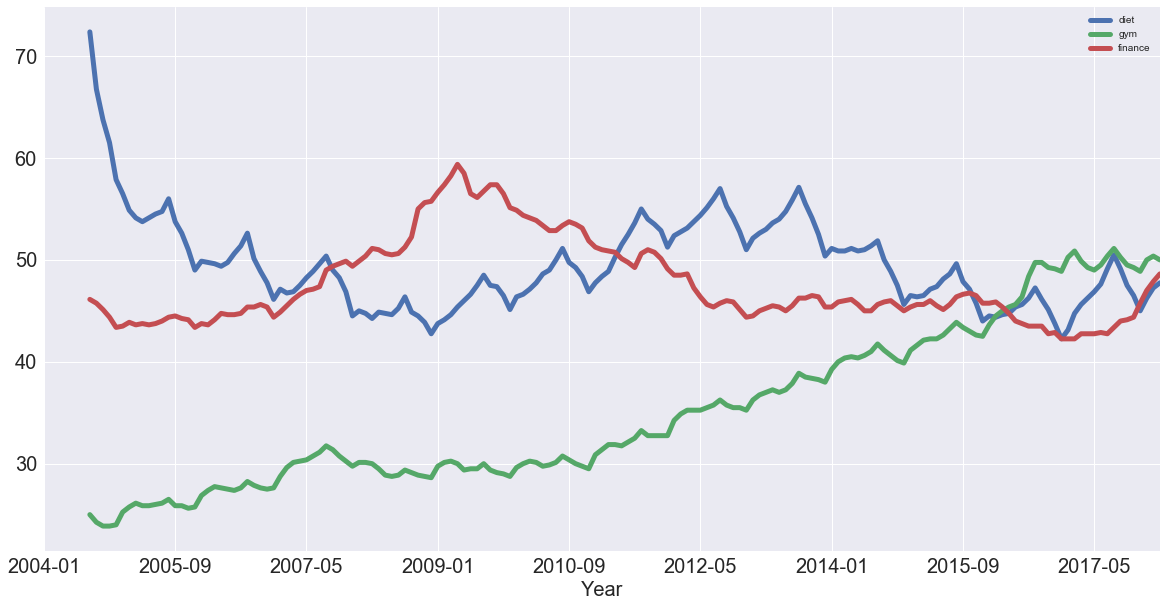

In [25]:
df.rolling(8).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

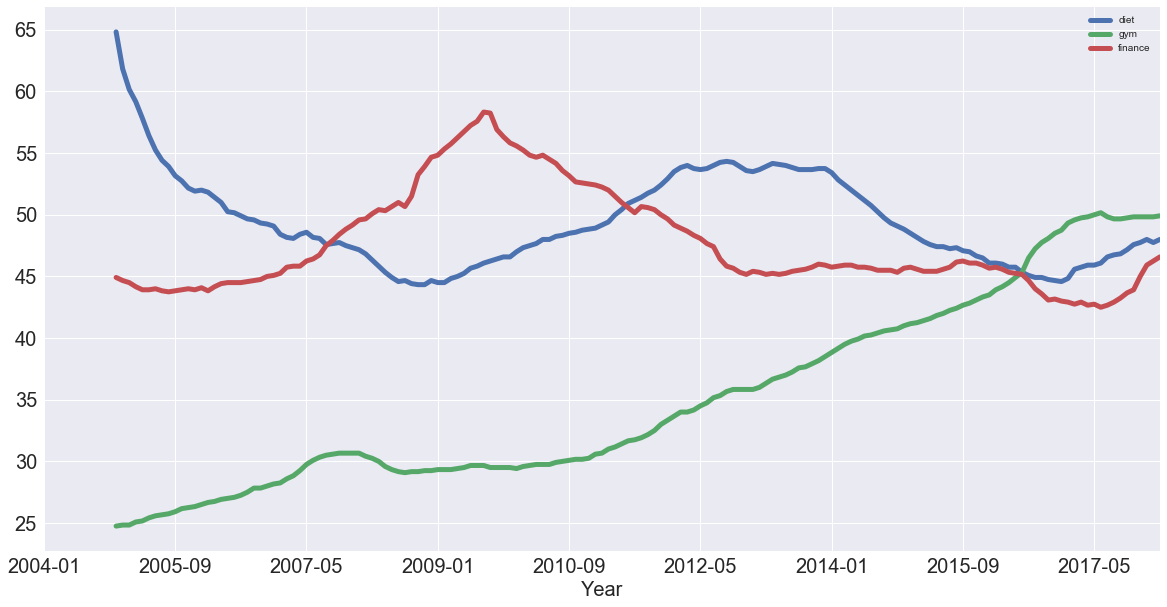

In [4]:
df.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

From above three figues, we could tell that `window size` 12 is the smoothiest one. It is easy to think of that because 12 months is exactly a year, which means the averaging can eliminate the impact of yearly seasonality. By proper `rolling average`, the noise and seasonality can be removed. From the figure above, we can also tell that the key word 'gym' is increasing monotonously in recent years, which could lead investment to go to fit times.

### Seasonality
One of the most import feature for time series is its seasonality, which means it is somehow repetitive. To discover this feature, we can apply `first-order differencing`. In `first-order differencing`, we will look into the difference of two temporally neaby data point. This is also a way to remove the trends. To see the outcome of this method, we can apply it on the sample dataset, e.g. 'diet' column. We will again use `pandas` builtin function `diff()` to calculate the different of two neaby data point.

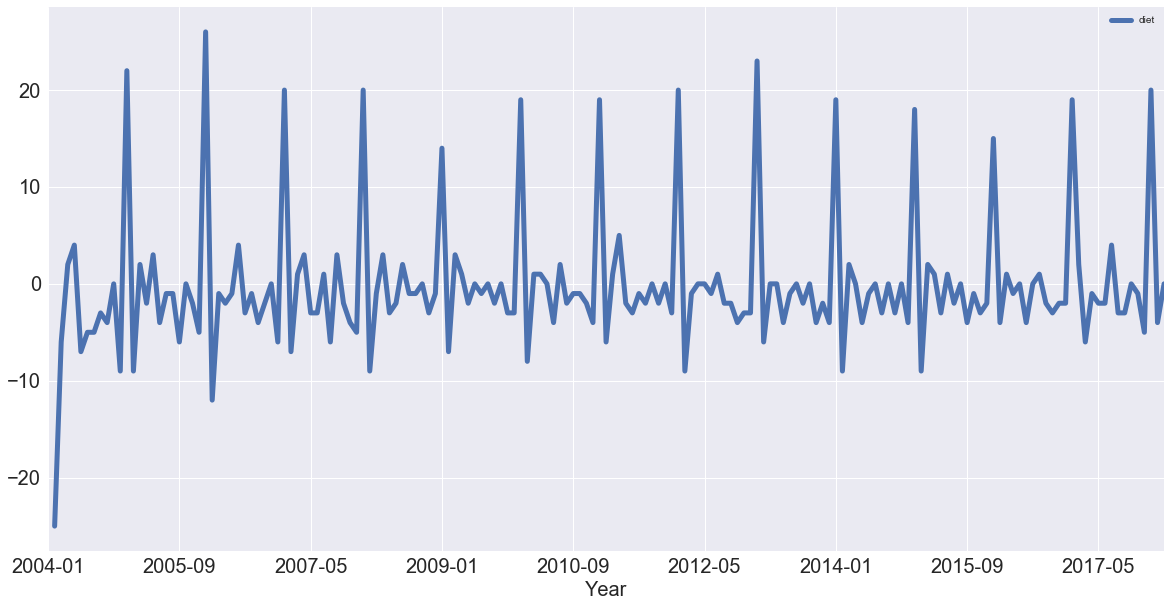

In [5]:
df[['diet']].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

From above figure, we can easily tell that the major seasonality for this dataset is yearly seasonality because we can see there is always a peak in difference in every january. By applying `first-order difference`, the trends in the dataset is removed and seasonality is more obvious than the raw data.

## Prediction: prophet introduction

From above we could see that time series is periodic and it is generally predictable by previous observations. Thus, it is a very important topic to predict future values for a time series. There are classical methods like `autoregressive integrated moving average` which is also called `ARIMA`. It is a the most popular model in time series and is implemented in a `python` package called `statsmodels`. This model can also be applied to remove the non-stationary of the time series. However, we will not get into details about this method, you may consult [here](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/) if you are intrested. It has all the details about `ARIMA`. This time we will focus on a package called `prophet`, as menetioned above for prediction. <br>
This pacakge is developed by `Facebook` to deal with time series and it is available for both `python` and `R`. It is a pretty powerful tool for real-world data. `Prophet` is optimized especially for problems that `Facebook` has been facing. It takes holidays, day of week into its model, even some special days like Super Bowl. Also it can deal with reasonable number of missing values. Besides, a big advantage of `prophet` is that it does not require lots of prior knowledge about the data. We will use a sample data from [here](https://github.com/facebook/prophet/blob/master/examples/example_wp_peyton_manning.csv) to illustrate its basic syntex.

We will again need `pandas` and `numpy` to store and manipulate our data. 

In [6]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

The sample data contains two columns. 'ds' is a timestamp in date and 'y' is the value for that day. To avoid too large values in the dataset, we will take log of 'y' values. Shown as below.

In [7]:
df = pd.read_csv('prophet_example.csv')
df['y'] = np.log(df['y'])
print(df.describe())
print(df.head())
print(df.tail())

                 y
count  2905.000000
mean      8.138958
std       0.845957
min       5.262690
25%       7.514800
50%       7.997999
75%       8.580168
max      12.846747
           ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572
              ds          y
2900  2016-01-16   7.817223
2901  2016-01-17   9.273878
2902  2016-01-18  10.333775
2903  2016-01-19   9.125871
2904  2016-01-20   8.891374


The sample dataset has values from late 2007 to early 2016. Then we can use these data to predict future values, e.g. predicting values from early 2016 to early 2017. 
The goal is to predict y value in the future. Basically what we need to do is to build a model, train it, and then predict using it with timestamp as input. `Prophet` basically follows typical `sklearn` model interface, which means we need to create an instance of `Prophet` and call `fit` and `predict` methods.

When creating a `prophet` instance, there are many arguments that we can pass into. One useful argument is confidential interval called `interval width`. Also, we can choose to fit the trends in with `linear regression` or `logistic regression` by set argument `growth` (it is `linear` by default). These two are mostly used basically. 

In [8]:
m = Prophet(interval_width=0.95, growth='linear')
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


`Prophet` also supply several functions to simulate data, do sampling, etc. Details can be found in the [source code](https://github.com/facebook/prophet/blob/master/python/fbprophet/forecaster.py). One of them can create future dataframe for testing or prediction called `make_future_dataframe`. It extends current data to requested periods. It has 3 arguments: `periods` - int number of forecast forward, this is required; `freq` - forecast frequency, can be any valid value for `pd.date_range` like 'D', 'M', default 'D'; `include_history` - boolean value for including history value or not, default `True`. By using the returned dataframe by `make_future_dataframe`, we can use `predict` to predict future values.

In [9]:
future = m.make_future_dataframe(365, include_history=False)

forecast = m.predict(future)
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2016-01-21,7.558438,7.558438,7.558438,7.675797,9.474489,0.999403,0.999403,0.999403,0.999403,0.999403,0.999403,-0.072248,-0.072248,-0.072248,1.071651,1.071651,1.071651,8.557841
1,2016-01-22,7.557410,7.557410,7.557410,7.655091,9.611537,1.016368,1.016368,1.016368,1.016368,1.016368,1.016368,-0.069582,-0.069582,-0.069582,1.085950,1.085950,1.085950,8.573778
2,2016-01-23,7.556382,7.556382,7.556382,7.421995,9.236380,0.786083,0.786083,0.786083,0.786083,0.786083,0.786083,-0.311706,-0.311706,-0.311706,1.097789,1.097789,1.097789,8.342465
3,2016-01-24,7.555354,7.555354,7.555354,7.742273,9.667491,1.155056,1.155056,1.155056,1.155056,1.155056,1.155056,0.048279,0.048279,0.048279,1.106777,1.106777,1.106777,8.710410
4,2016-01-25,7.554326,7.554211,7.554326,8.107476,9.947201,1.464802,1.464802,1.464802,1.464802,1.464802,1.464802,0.352301,0.352301,0.352301,1.112501,1.112501,1.112501,9.019128


From above we could see that `predict` function returns lots of values. The returned dataframe basically has all the predicted components that we need. We will not go into details about all the components but the most import three in general case are `yhat`, `y_lower`, `y_upper`, which stands for the predicted value, lower bound, higer bound of our prediction. We can extract them easily.

In [10]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-21,8.557841,7.675797,9.474489
1,2016-01-22,8.573778,7.655091,9.611537
2,2016-01-23,8.342465,7.421995,9.236380
3,2016-01-24,8.710410,7.742273,9.667491
4,2016-01-25,9.019128,8.107476,9.947201


Also `prophet` provides easy function to visualize the results. We can simply use `plot` method to see the predicted value and confidice interval. To customize your figure, you can pass an `matplotlib axes` to the function to specify on which to plot the figure.

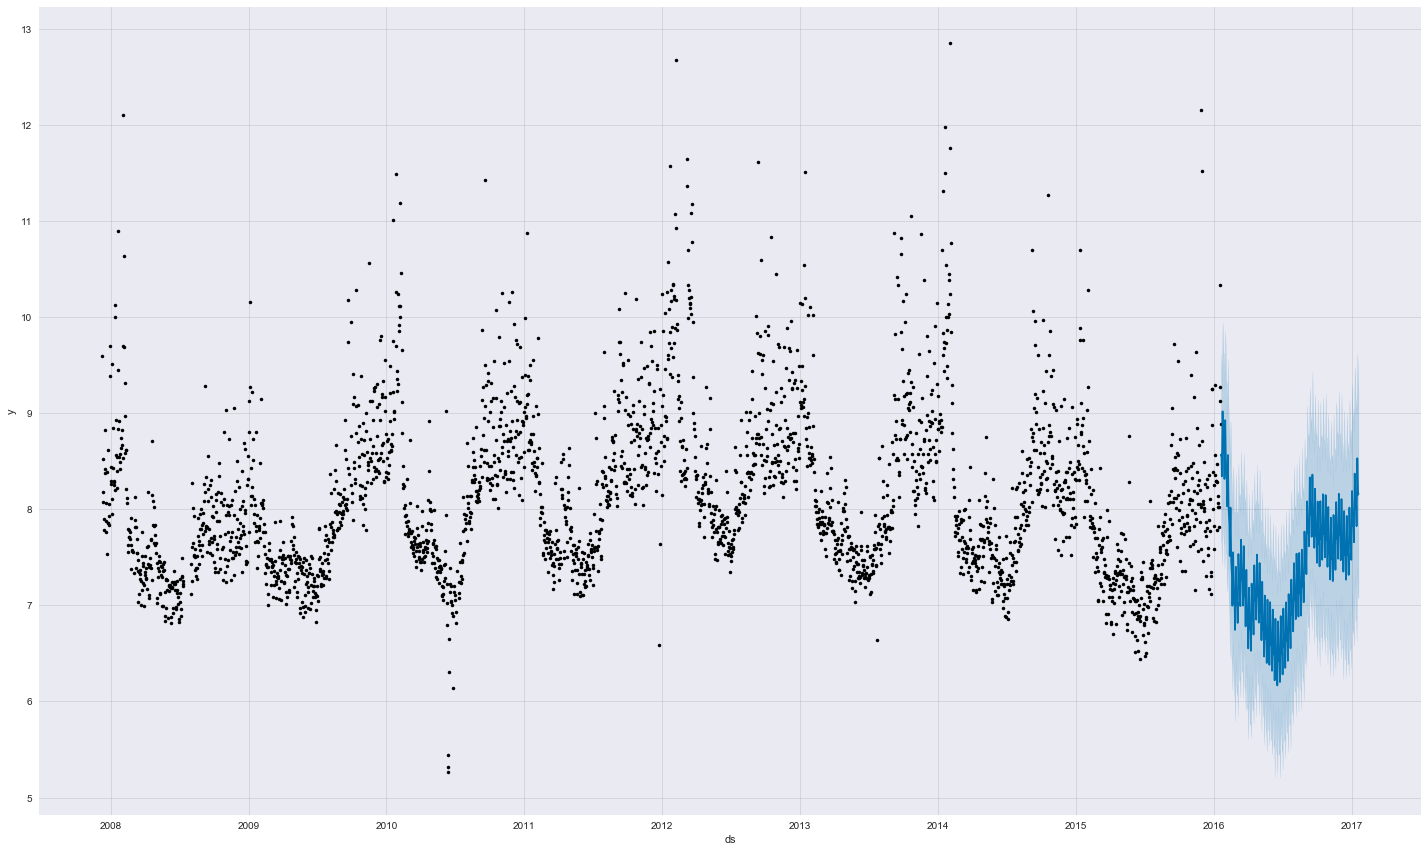

In [11]:
fig = plt.figure(facecolor='w', figsize=(20, 12), linewidth=2)
ax = fig.add_subplot(111)
m.plot(forecast, ax=ax, xlabel='ds', ylabel='y');

## Reference and summary
All above provides pretty easy methods to handle time series data and introduced some basic use of `prophet` package. I consider `prophet` is a very useful and easily understanding package. And we can deal with many difficult problems with it. Some sources and documents in the tutorial can be found below.
- [Prophet Docs and Github](https://facebook.github.io/prophet/)
- [Seasonality and Trends Tutorials](https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial)
- [ARIMA Tutorial](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)